In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\User\Downloads\train (1).csv")

In [3]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
data.corr()['is_promoted'].sort_values()

no_of_trainings        -0.024896
age                    -0.017166
length_of_service      -0.010670
employee_id             0.001206
previous_year_rating    0.159320
avg_training_score      0.181147
awards_won?             0.195871
KPIs_met >80%           0.221582
is_promoted             1.000000
Name: is_promoted, dtype: float64

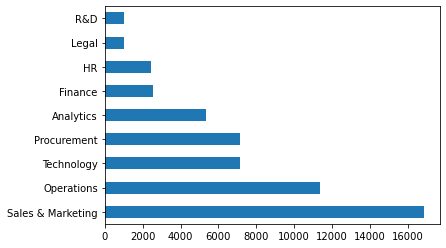

In [7]:
data['department'].value_counts().plot(kind='barh');

In [8]:
data['education'].isnull().sum()

2409

In [9]:
data['previous_year_rating'].isnull().sum()

4124

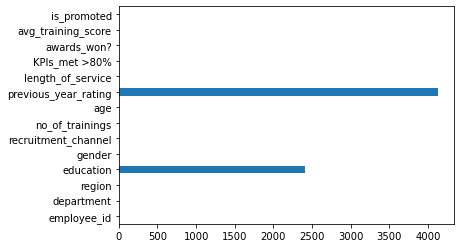

In [10]:
data.isnull().sum().plot(kind='barh');

#### Filling out missing values for previous_year_rating

In [11]:
data.corr()['previous_year_rating'].sort_values()

no_of_trainings        -0.063126
length_of_service       0.000253
employee_id             0.004533
age                     0.006008
awards_won?             0.027738
avg_training_score      0.075139
is_promoted             0.159320
KPIs_met >80%           0.351578
previous_year_rating    1.000000
Name: previous_year_rating, dtype: float64

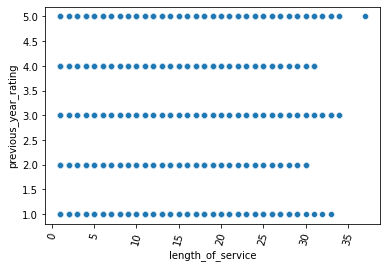

In [12]:
sns.scatterplot(y='previous_year_rating',x='length_of_service',data=data)

plt.xticks(rotation=75);

So, it can be concluded that there isn't anu substantial relationship between previous year ratings and length of service

So, it can also be concluded that people with a higher average training score usually have a higher previous year rating

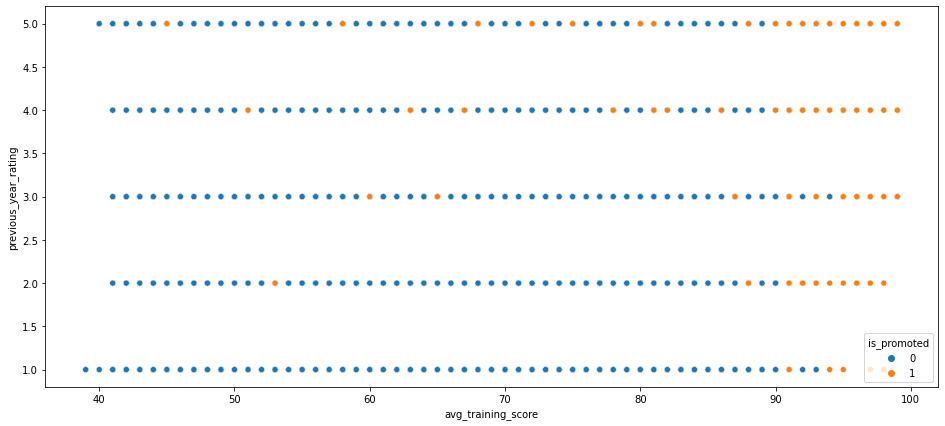

In [13]:
plt.figure(figsize=(16,7))

sns.scatterplot(y=data['previous_year_rating'], x=data['avg_training_score'],hue=data['is_promoted']);


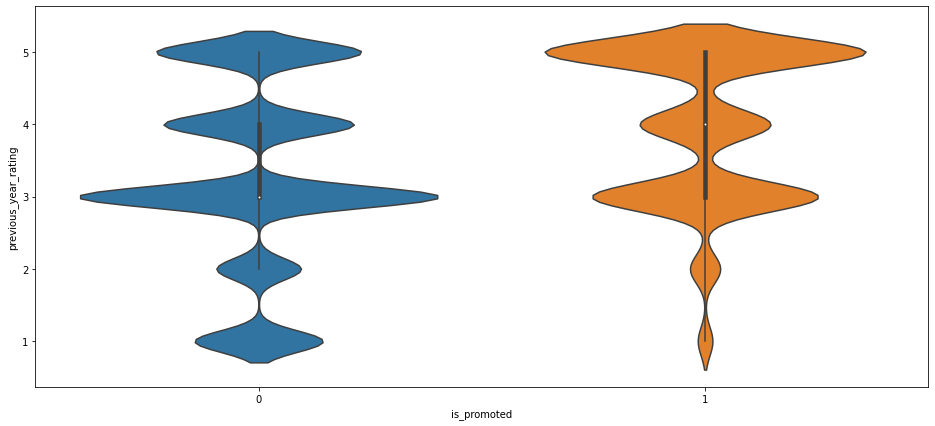

In [14]:
plt.figure(figsize=(16,7))

sns.violinplot(y=data['previous_year_rating'], x=data['is_promoted']);


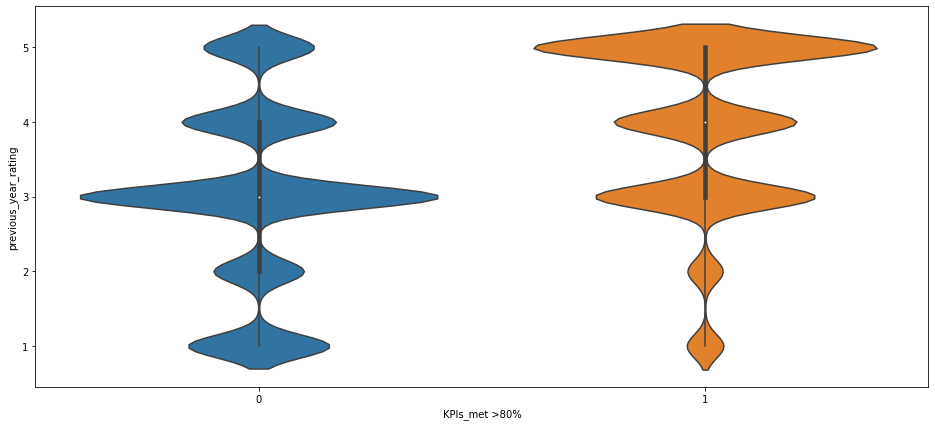

In [15]:
plt.figure(figsize=(16,7))

sns.violinplot(y=data['previous_year_rating'], x=data['KPIs_met >80%']);


In [16]:
data_prev_rate_nan=data[data.previous_year_rating.isna()]

data_prev_rate_nan.reset_index(drop=True, inplace=True)

data_prev_rate_nan

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
1,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
2,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
3,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
4,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
4120,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
4121,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
4122,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


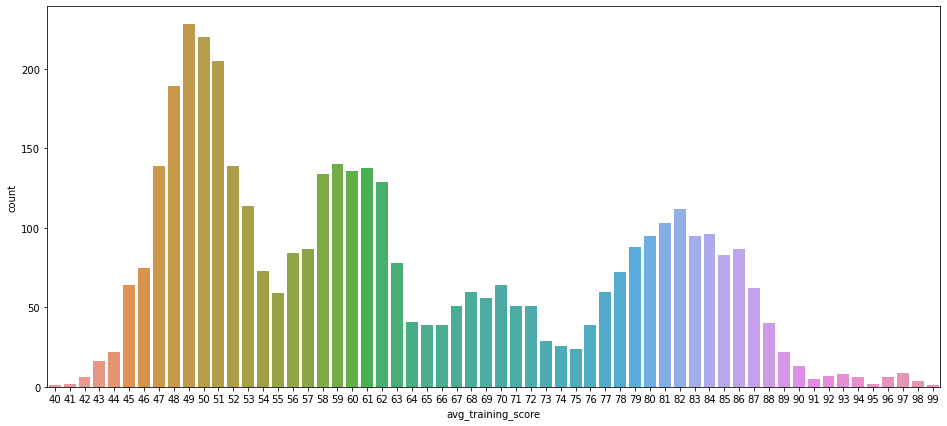

In [17]:
plt.figure(figsize=(16,7))

sns.countplot(data_prev_rate_nan['avg_training_score']);


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


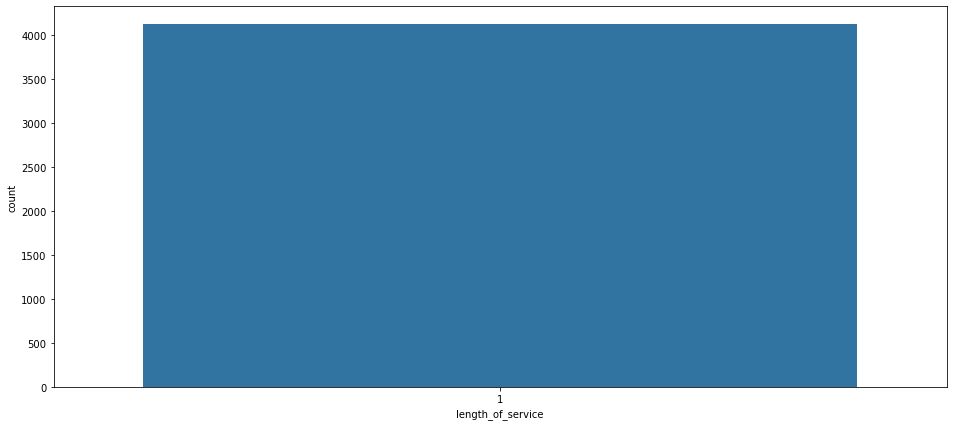

In [18]:
plt.figure(figsize=(16,7))


sns.countplot(data_prev_rate_nan['length_of_service']);


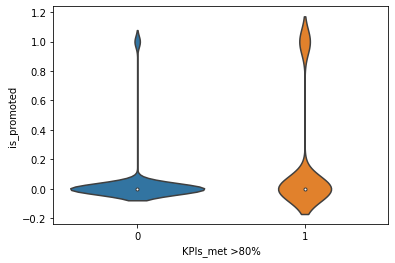

In [19]:
data_1y=data[data['length_of_service']==1]


sns.violinplot(x='KPIs_met >80%',y='is_promoted', data=data_1y);

So, for all rows with missing values in Previous years ratings, all have a length of service of exactly 1. Certainly, 
this is not a coincidence!

A possible reason can be that as it is apparent from their years of service, since it is their first year of service, that's why
they probably don't have a previous year rating.

So, taking this into consideration, the nan values in the previous ratings column can be filled accordingly as:
    
    1) Those who are not promoted, taking the average of the previous year ratings as accordingly if they have met the 
      KPI score or not as usualy people who have met the KPI score have high rating.
      
    2) For those who are promoted, taking the average of previous year ratings as accordingly they have been promoted or not
      as people who have been promoted usually have high rating.
                                                                                                             ]

In [20]:
conditions=[ (data_prev_rate_nan['is_promoted']==1),
            (data_prev_rate_nan['is_promoted']==0) & (data_prev_rate_nan['KPIs_met >80%']==1),
            (data_prev_rate_nan['is_promoted']==0 ) &(data_prev_rate_nan['KPIs_met >80%']==0)
           ]

values=[4,4,3]

data_prev_rate_nan['previous_year_rating']=np.select(conditions, values)

C:\Users\User\AppData\Local\Temp/ipykernel_13408/2769601801.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prev_rate_nan['previous_year_rating']=np.select(conditions, values)


In [21]:
data_prev_rating_not_nan=data[data['previous_year_rating'].notna()]

data_new=pd.concat([data_prev_rating_not_nan,data_prev_rate_nan])

data_new

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,4.0,1,1,0,88,0
4120,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,4.0,1,1,0,56,1
4121,10546,Finance,region_6,Bachelor's,m,other,1,28,4.0,1,1,0,61,0
4122,37919,Finance,region_2,Bachelor's,m,other,1,23,4.0,1,1,0,61,0


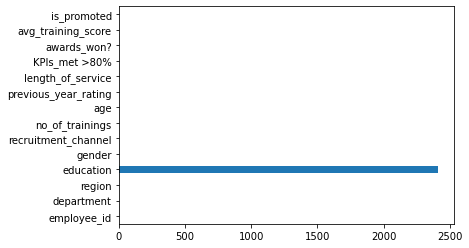

In [22]:
data_new.isna().sum().plot(kind='barh');

### Filling out missing values for Education

In [23]:
data[data.education.isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0


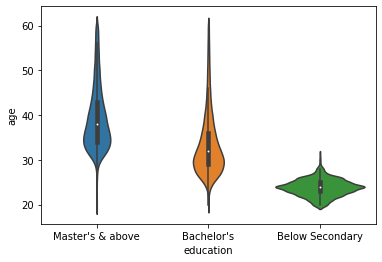

In [24]:
sns.violinplot(x='education', y='age' ,data=data);

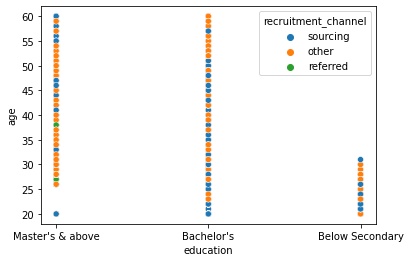

In [25]:
sns.scatterplot(x='education', y='age', hue='recruitment_channel' ,data=data);

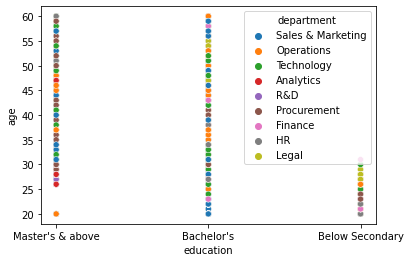

In [26]:
sns.scatterplot(x='education', y='age', hue='department' ,data=data);

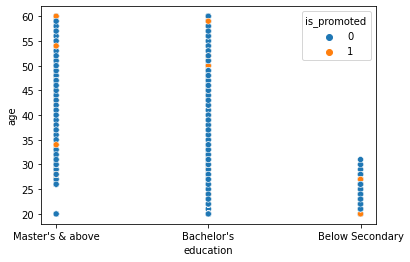

In [27]:
sns.scatterplot(x='education', y='age', hue='is_promoted' ,data=data);

In [28]:
edu_dict={"Bachelor's":1,"Master's & above":2,"Below Secondary":0,"Bachelors education":1,"Masters":2}

def edu_encode(data):
    for k in edu_dict:
        data['education'].replace(to_replace=k, value=edu_dict[k],inplace=True)
    return data

In [29]:
edu_encode(data_new)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,2.0,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,1.0,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,1.0,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,1.0,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,1.0,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,74615,R&D,region_31,1.0,m,sourcing,1,30,4.0,1,1,0,88,0
4120,11685,Operations,region_15,1.0,m,sourcing,1,31,4.0,1,1,0,56,1
4121,10546,Finance,region_6,1.0,m,other,1,28,4.0,1,1,0,61,0
4122,37919,Finance,region_2,1.0,m,other,1,23,4.0,1,1,0,61,0


In [30]:
data_new_education_nan=data_new[data_new['education'].isna()]

data_new_education_nan

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
87,69094,Sales & Marketing,region_2,NaN,m,sourcing,1,39,1.0,9,0,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,25935,Sales & Marketing,region_29,NaN,m,sourcing,1,27,3.0,1,0,0,54,0
4056,589,Sales & Marketing,region_14,NaN,m,other,2,24,3.0,1,0,0,47,0
4064,12248,Sales & Marketing,region_2,NaN,m,sourcing,1,27,3.0,1,0,0,53,0
4066,71684,Sales & Marketing,region_2,NaN,f,other,1,25,4.0,1,0,1,86,1


So, based on the above 4 plots, it can be concluded that:
    1) Most people with higher degrees are of higher age.
    2)Most people with Master degrees have been recruited through 'other' recruitment channel.

So, the nan values can be filled as accordingly:


In [31]:
conditions=[(data_new_education_nan['age']>35),
            (data_new_education_nan['age']>26) & (data_new_education_nan['age']<=35),
            (data_new_education_nan['age']<=25)
    ]

values=[2.0,1.0,0.0]

data_new_education_nan['education']=np.select(conditions,values)





C:\Users\User\AppData\Local\Temp/ipykernel_13408/4034606223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_education_nan['education']=np.select(conditions,values)


In [32]:
data_new_education_notnan=data_new[data_new['education'].notna()]

data_final=pd.concat([data_new_education_notnan,data_new_education_nan])

data=data_final

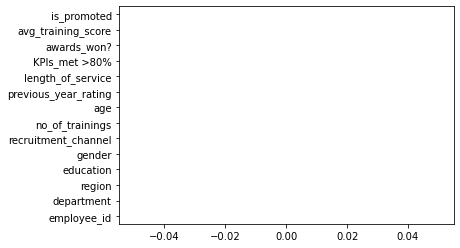

In [33]:
data.isna().sum().plot(kind='barh');

In [34]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,2.0,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,1.0,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,1.0,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,1.0,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,1.0,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,25935,Sales & Marketing,region_29,1.0,m,sourcing,1,27,3.0,1,0,0,54,0
4056,589,Sales & Marketing,region_14,0.0,m,other,2,24,3.0,1,0,0,47,0
4064,12248,Sales & Marketing,region_2,1.0,m,sourcing,1,27,3.0,1,0,0,53,0
4066,71684,Sales & Marketing,region_2,0.0,f,other,1,25,4.0,1,0,1,86,1


### Feature Engineering

In [35]:
data.corr()['is_promoted'].sort_values()

no_of_trainings        -0.024896
age                    -0.017166
length_of_service      -0.010670
employee_id             0.001206
education               0.024149
previous_year_rating    0.163834
avg_training_score      0.181147
awards_won?             0.195871
KPIs_met >80%           0.221582
is_promoted             1.000000
Name: is_promoted, dtype: float64

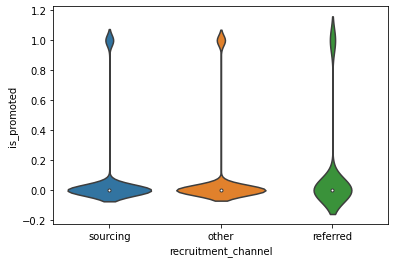

In [36]:
sns.violinplot(x='recruitment_channel',y='is_promoted', data=data);

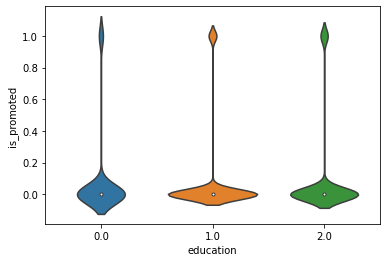

In [37]:
sns.violinplot(x='education',y='is_promoted', data=data);

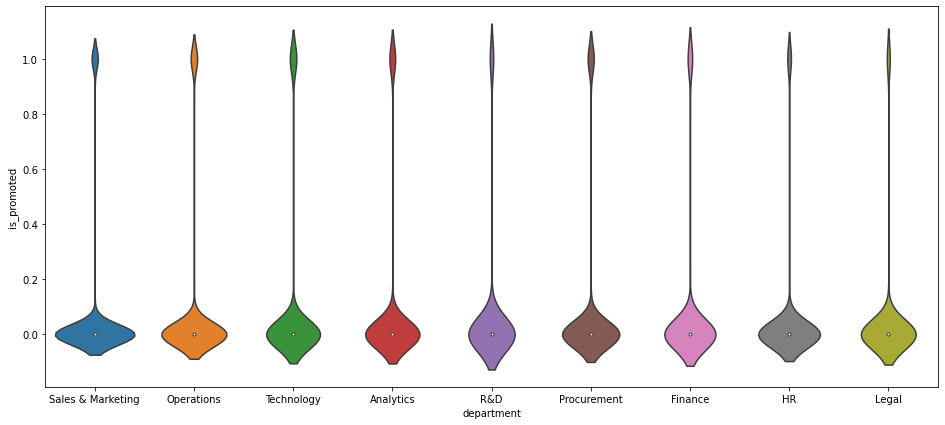

In [38]:
plt.figure(figsize=(16,7))

sns.violinplot(x='department',y='is_promoted', data=data);

In [39]:
data['education'].value_counts()

1.0    37849
2.0    15437
0.0     1522
Name: education, dtype: int64

Education was encoded keeping a bias on the Degree. However for the following categories, there isn't a need for a bias.

In [40]:
data=pd.get_dummies(data,columns=['recruitment_channel','department'])



In [41]:
data

,employee_id,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,recruitment_channel_sourcing,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,65438,region_7,2.0,f,1,35,5.0,8,1,0,...,1,0,0,0,0,0,0,0,1,0
1,65141,region_22,1.0,m,1,30,5.0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7513,region_19,1.0,m,1,34,3.0,7,0,0,...,1,0,0,0,0,0,0,0,1,0
3,2542,region_23,1.0,m,2,39,1.0,10,0,0,...,0,0,0,0,0,0,0,0,1,0
4,48945,region_26,1.0,m,1,45,3.0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,25935,region_29,1.0,m,1,27,3.0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4056,589,region_14,0.0,m,2,24,3.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4064,12248,region_2,1.0,m,1,27,3.0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4066,71684,region_2,0.0,f,1,25,4.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


Dropping the following columns because they don't have a significant effect on the promotion

In [42]:
data.drop(['employee_id','region','gender'],axis=1,inplace=True)


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [44]:
X=data.drop(['is_promoted'], axis=1) 
y=data['is_promoted']
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [45]:
std=MinMaxScaler()
std.fit(X_train)
std.fit_transform(X_test)

array([[0.5       , 0.        , 0.45      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.45      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.325     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.11111111, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.45      , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.675     , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C = 1.0)
clf.fit(X_train,y_train)

SVC()

In [47]:
clf

SVC()

In [48]:
y_pred=clf.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16526
           1       0.00      0.00      0.00      1561

    accuracy                           0.91     18087
   macro avg       0.46      0.50      0.48     18087
weighted avg       0.83      0.91      0.87     18087



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Although the accuracy is high, the recall for the positive class is 0 !!. This is probably due to the classesn in the dataset being highly imbalanced as can be seen from the plot below.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


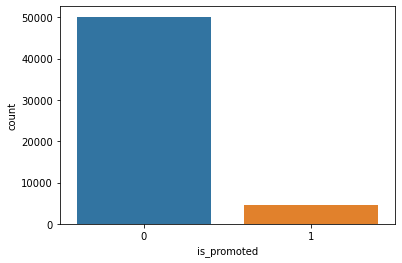

In [49]:
sns.countplot('is_promoted',data=data);

It's apparent that the Dataset is highly inbalanced. So SMOTE technique is applied to resample the data.

In [50]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification


In [51]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25)

Scaling Oversampled Data using MinMaxScaler

In [53]:
std.fit(X_train)
X_train=std.transform(X_train)
X_test=std.fit_transform(X_test)

In [54]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
preds = xgb_cl.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
print('XGBoost : \n', classification_report(y_test, preds))

XGBoost : 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     12511
           1       0.94      0.90      0.92     12559

    accuracy                           0.92     25070
   macro avg       0.92      0.92      0.92     25070
weighted avg       0.92      0.92      0.92     25070



In [56]:
X_train

array([[0.5      , 0.       , 0.325    , ..., 0.       , 0.       ,
        0.       ],
       [0.7673955, 0.       , 0.275    , ..., 0.       , 0.       ,
        0.       ],
       [0.5      , 0.       , 0.175    , ..., 0.       , 1.       ,
        0.       ],
       ...,
       [1.       , 0.       , 0.875    , ..., 0.       , 0.       ,
        0.       ],
       [1.       , 0.       , 0.275    , ..., 0.       , 0.       ,
        0.       ],
       [0.5      , 0.       , 0.125    , ..., 0.       , 0.       ,
        1.       ]])

In [57]:
!pip install catboost

In [58]:
import catboost as cb
model_cat_def = cb.CatBoostClassifier()
model_cat_def.fit(X_train,y_train)
y_cat_pred=model_cat_def.predict(X_test)




Learning rate set to 0.065178
0:	learn: 0.6495977	total: 178ms	remaining: 2m 58s
1:	learn: 0.6176497	total: 219ms	remaining: 1m 49s
2:	learn: 0.5873364	total: 255ms	remaining: 1m 24s
3:	learn: 0.5594109	total: 298ms	remaining: 1m 14s
4:	learn: 0.5425758	total: 332ms	remaining: 1m 5s
5:	learn: 0.5188928	total: 374ms	remaining: 1m 1s
6:	learn: 0.5010376	total: 410ms	remaining: 58.2s
7:	learn: 0.4778255	total: 442ms	remaining: 54.8s
8:	learn: 0.4603147	total: 487ms	remaining: 53.7s
9:	learn: 0.4471904	total: 525ms	remaining: 52s
10:	learn: 0.4372350	total: 570ms	remaining: 51.2s
11:	learn: 0.4278915	total: 604ms	remaining: 49.7s
12:	learn: 0.4053106	total: 637ms	remaining: 48.4s
13:	learn: 0.4009918	total: 675ms	remaining: 47.5s
14:	learn: 0.3948417	total: 716ms	remaining: 47s
15:	learn: 0.3878121	total: 750ms	remaining: 46.1s
16:	learn: 0.3826271	total: 792ms	remaining: 45.8s
17:	learn: 0.3715223	total: 822ms	remaining: 44.9s
18:	learn: 0.3589578	total: 855ms	remaining: 44.2s
19:	learn: 

In [59]:
print('CatBoost : \n', classification_report(y_test, y_cat_pred))

CatBoost : 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     12511
           1       0.94      0.91      0.93     12559

    accuracy                           0.93     25070
   macro avg       0.93      0.93      0.93     25070
weighted avg       0.93      0.93      0.93     25070



The accuracy although is same as with xgboost, the recall score for catboost is higher. The recall score is an important 
parameter because it entails how correctly the model is predicting the promotions of the employees.

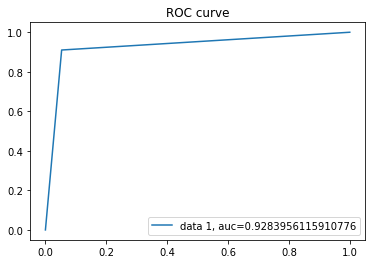

In [61]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_cat_pred)
auc = metrics.roc_auc_score(y_test, y_cat_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()

#### Trying to hyperparameter tune the CatBoost model

In [62]:
from sklearn.model_selection import GridSearchCV

grid = {'max_depth': [3,4,5,6],'n_estimators':[100, 200, 300,400]}
gscv = GridSearchCV (estimator = model_cat_def, param_grid = grid, scoring ='accuracy', cv = 5)
gscv.fit(X_train, y_train)

Learning rate set to 0.489467
0:	learn: 0.5651229	total: 25.3ms	remaining: 2.51s
1:	learn: 0.5044409	total: 48.1ms	remaining: 2.35s
2:	learn: 0.4704916	total: 66.6ms	remaining: 2.15s
3:	learn: 0.4164536	total: 89.9ms	remaining: 2.16s
4:	learn: 0.3608665	total: 118ms	remaining: 2.23s
5:	learn: 0.3492934	total: 135ms	remaining: 2.12s
6:	learn: 0.3374134	total: 151ms	remaining: 2s
7:	learn: 0.3058156	total: 173ms	remaining: 1.99s
8:	learn: 0.2988211	total: 184ms	remaining: 1.86s
9:	learn: 0.2932468	total: 198ms	remaining: 1.78s
10:	learn: 0.2829679	total: 215ms	remaining: 1.74s
11:	learn: 0.2675530	total: 233ms	remaining: 1.71s
12:	learn: 0.2620091	total: 251ms	remaining: 1.68s
13:	learn: 0.2581276	total: 272ms	remaining: 1.67s
14:	learn: 0.2512780	total: 297ms	remaining: 1.68s
15:	learn: 0.2469768	total: 318ms	remaining: 1.67s
16:	learn: 0.2450367	total: 340ms	remaining: 1.66s
17:	learn: 0.2430644	total: 359ms	remaining: 1.63s
18:	learn: 0.2394969	total: 376ms	remaining: 1.6s
19:	learn: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000154FC6AED00>,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [63]:
print(gscv.best_estimator_)
print(round(gscv.best_score_,2))
print(gscv.best_params_)

0.93
{'max_depth': 6, 'n_estimators': 400}


So, after hyper-parameter tuning, there isn't much change to write home about.

# Final Thoughts:
    
Catboost model can be chosen because it has a high accuracy with balanced Precision and especially, the 
Recall score.